*   Name: Bhaskarjyoti Goswami
*   Project: Final Project on Emotion Detection using CNN
*   Dataset: kaggle datasets download -d ananthu017/emotion-detection-fer
*   Program: Applied DS, ML & Edge AI, Batch-3









In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
! chmod 600 ~/.kaggle/kaggle.json

In [3]:
! kaggle datasets download -d ananthu017/emotion-detection-fer

 63% 41.0M/65.2M [00:00<00:00, 48.2MB/s]
100% 65.2M/65.2M [00:00<00:00, 70.0MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/emotion-detection-fer.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()  #unzipping the file and reading it

In [5]:
import numpy as np
import pandas as pd
import random
import tensorflow as tf
import os , cv2
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix
import keras
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, Input, Dropout

In [6]:
train = '/content/train'
label_list = os.listdir(train)

print(label_list)

['neutral', 'disgusted', 'happy', 'surprised', 'fearful', 'sad', 'angry']


The Dataset has 7 classes

In [7]:
# generators
train= keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'categorical',
    batch_size=32,
    image_size=(256,256)
)

test= keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'categorical',
    batch_size=32,
    image_size=(256,256)
)

Found 28709 files belonging to 7 classes.
Found 7178 files belonging to 7 classes.


In [8]:
train

<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 7), dtype=tf.float32, name=None))>

In [9]:
test

<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 7), dtype=tf.float32, name=None))>

In [10]:
# Normalize the dataset by dividing the image pixel to 255. we can also use minmax scaler to normalize the data
def process(image,label):
    image = tf.cast(image/255. ,tf.float32) #here float is to print the reminder in float form
    return image,label

train= train.map(process)
test= test.map(process)

In [11]:
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

## Building CNN Model-1

In [12]:
# create CNN model

num_classes=len(label_list)

model1 = Sequential()

model1.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model1.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model1.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model1.add(Flatten())
model1.add(Dropout(0.3))
model1.add(Dense(num_classes, activation="softmax"))

In [13]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [14]:
from keras import callbacks # importing callbacks from keras to use early stopping

callback= tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
#early stopping helps in stopping the running of epochs, when there is a best accuracy among them.

In [15]:
model1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
history = model1.fit(train,epochs= 20,validation_data=test, callbacks=[callback])

Epoch 1/20
898/898 [==============================] - 102s 99ms/step - loss: 13.3518 - accuracy: 0.2702 - val_loss: 7.6473 - val_accuracy: 0.3305
Epoch 2/20
898/898 [==============================] - 87s 96ms/step - loss: 4.7280 - accuracy: 0.3406 - val_loss: 2.3974 - val_accuracy: 0.3157
Epoch 3/20
898/898 [==============================] - 89s 98ms/step - loss: 1.6942 - accuracy: 0.4377 - val_loss: 1.6033 - val_accuracy: 0.3923
Epoch 4/20
898/898 [==============================] - 88s 98ms/step - loss: 1.3331 - accuracy: 0.5027 - val_loss: 1.5625 - val_accuracy: 0.4147
Epoch 5/20
898/898 [==============================] - 87s 96ms/step - loss: 1.2726 - accuracy: 0.5250 - val_loss: 1.4861 - val_accuracy: 0.4362
Epoch 6/20
898/898 [==============================] - 86s 95ms/step - loss: 1.2169 - accuracy: 0.5481 - val_loss: 1.5511 - val_accuracy: 0.4303
Epoch 7/20
898/898 [==============================] - 85s 95ms/step - loss: 1.1513 - accuracy: 0.5703 - val_loss: 1.4661 - val_accurac

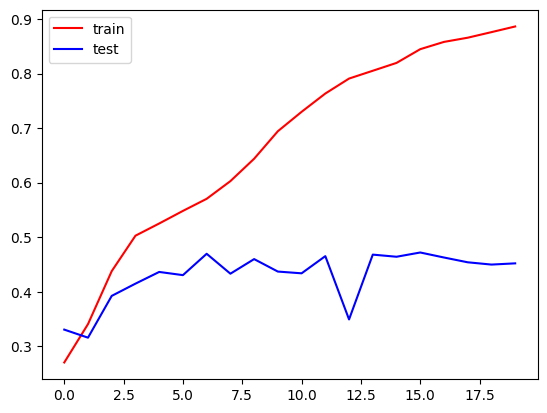

In [17]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='test')
plt.legend()
plt.show()

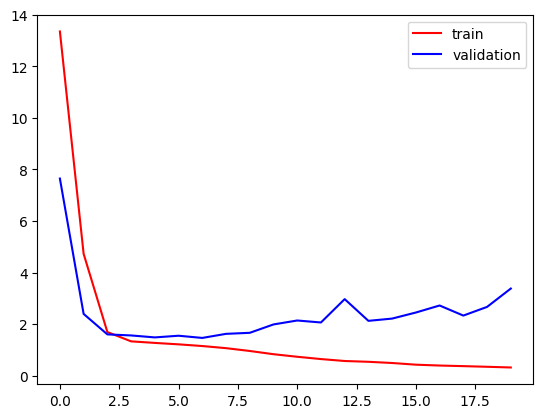

In [18]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

*   The plots show that training accuracy keep on increasing and validation accuracy is moving in the range of 31%- 46%. Both training & validation accuracy are distant apart.
*   This is a sign of overfitting.
*   To reduce overfitting, data augmentation method is used in below model.




In [19]:
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [20]:
# Define the dimensions of dataset images
img_height = 48
img_width = 48
batch_size = 32

In [21]:
# Create an ImageDataGenerator for data augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [22]:
validation_datagen = ImageDataGenerator(rescale=1.0/255)

In [23]:
# Load the training dataset
train_data = train_datagen.flow_from_directory(
    '/content/train',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 28709 images belonging to 7 classes.


In [24]:
test_data = validation_datagen.flow_from_directory(
    '/content/test',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 7178 images belonging to 7 classes.


## Building CNN Model-2

In [25]:
# CNN Model-2

model2 = Sequential()

model2.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(48,48,3)))
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))


model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(7, activation="softmax"))    # 7 emotion classes

In [26]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 46, 46, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 23, 23, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 10, 10, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 4, 4, 128)        

In [27]:
# Compile the model-2
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:
from keras import callbacks# importing callbacks from keras to use early stopping
#early stopping helps in stopping the running of epochs, when there is a best accuracy among them.
callback= tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

In [29]:
# Train the model-2
history1= model2.fit(train_data, epochs=50,validation_data=test_data,callbacks=[callback])

Epoch 1/50
898/898 [==============================] - 43s 45ms/step - loss: 1.7540 - accuracy: 0.2824 - val_loss: 1.6084 - val_accuracy: 0.3573
Epoch 2/50
898/898 [==============================] - 41s 45ms/step - loss: 1.5836 - accuracy: 0.3774 - val_loss: 1.3927 - val_accuracy: 0.4682
Epoch 3/50
898/898 [==============================] - 42s 46ms/step - loss: 1.4526 - accuracy: 0.4394 - val_loss: 1.3034 - val_accuracy: 0.4950
Epoch 4/50
898/898 [==============================] - 42s 47ms/step - loss: 1.3853 - accuracy: 0.4689 - val_loss: 1.2391 - val_accuracy: 0.5237
Epoch 5/50
898/898 [==============================] - 40s 45ms/step - loss: 1.3297 - accuracy: 0.4920 - val_loss: 1.2007 - val_accuracy: 0.5408
Epoch 6/50
898/898 [==============================] - 40s 45ms/step - loss: 1.3101 - accuracy: 0.5002 - val_loss: 1.1974 - val_accuracy: 0.5453
Epoch 7/50
898/898 [==============================] - 40s 45ms/step - loss: 1.2796 - accuracy: 0.5126 - val_loss: 1.1960 - val_accuracy:

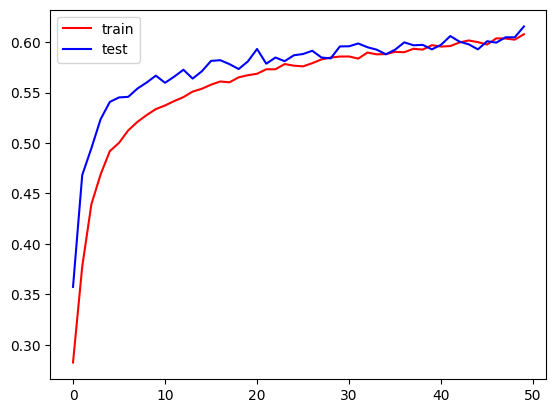

In [30]:
import matplotlib.pyplot as plt

plt.plot(history1.history['accuracy'],color='red',label='train')
plt.plot(history1.history['val_accuracy'],color='blue',label='test')
plt.legend()
plt.show()

Both Training & Validation accuracy keep on increasing.

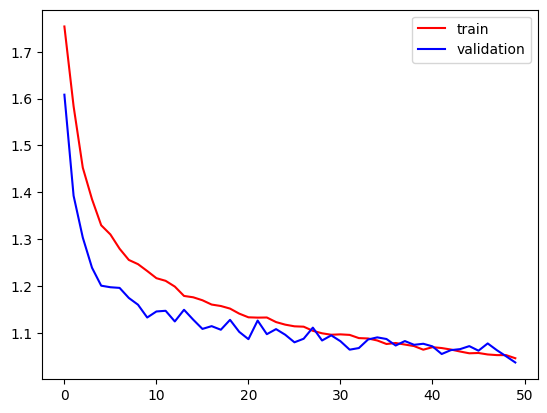

In [31]:
plt.plot(history1.history['loss'],color='red',label='train')
plt.plot(history1.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

Both Training & Validation losses are decreasing.

## Evaluate the final model on the test set

In [32]:
loss, accuracy = model2.evaluate(test_data)

# Print the loss and accuracy
print("Loss: ", loss)
print("Accuracy: ", accuracy)

225/225 [==============================] - 3s 13ms/step - loss: 1.0368 - accuracy: 0.6156
Loss:  1.0368489027023315
Accuracy:  0.615631103515625


In [45]:
im_path = "/content/test/angry/im112.png"
img = tf.keras.utils.load_img(
    im_path, target_size=(img_height, img_width)
)
print(img.size)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch
print(img_array.shape)
predictions = model2.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(label_list[np.argmax(score)], 100 * np.max(score))
)

(48, 48)
(1, 48, 48, 3)
1/1 [==============================] - 0s 21ms/step
This image most likely belongs to angry with a 31.18 percent confidence.
